<a href="https://colab.research.google.com/github/Eserhimas/Fundamentals/blob/main/divvy_conditional_seasonality_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from prophet import Prophet
from prophet.plot import plot_seasonality

from google.colab import drive


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
path = '/content/gdrive/MyDrive/Repository/Datasets/Divvy_hourly/divvy_hourly.csv'
data = pd.read_csv(path)
data.head()

,date,rides
0,1/1/2014 1:00,1
1,1/1/2014 2:00,9
2,1/1/2014 3:00,4
3,1/1/2014 4:00,1
4,1/1/2014 7:00,2


In [29]:
data.date = pd.to_datetime(data.date)

In [30]:
data.columns = ['ds', 'y']

In [32]:
data['IsWeekend'] = data['ds'].dt.weekday >= 5 # 5=Saturday, 6= Sunday
data['IsWeekday'] = data['ds'].dt.weekday < 5 # 0 = Monday

In [33]:
data.head()

,ds,y,IsWeekend,IsWeekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True


In [35]:
model = Prophet(seasonality_mode = 'multiplicative',
                yearly_seasonality=6,
                weekly_seasonality=6,
                daily_seasonality=False) # adding conditional seasonality

model.add_seasonality(name='daily_weekends',
                      period=1,
                      fourier_order=3,
                      condition_name='IsWeekend')

model.add_seasonality(name='daily_weekdays',
                      period=1,
                      fourier_order=3,
                      condition_name='IsWeekday')

In [36]:
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcisc4p4y/f3j03sn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcisc4p4y/fmut7wyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30495', 'data', 'file=/tmp/tmpcisc4p4y/f3j03sn7.json', 'init=/tmp/tmpcisc4p4y/fmut7wyt.json', 'output', 'file=/tmp/tmpcisc4p4y/prophet_modelns41ka5z/prophet_model-20240103073344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
pred = model.make_future_dataframe(periods=365*24,
                                     freq='h')

pred['IsWeekend'] = pred['ds'].dt.weekday >= 5 # 5=Saturday, 6= Sunday
pred['IsWeekday'] = pred['ds'].dt.weekday < 5 # 0 = Monday

forecast = model.predict(pred)


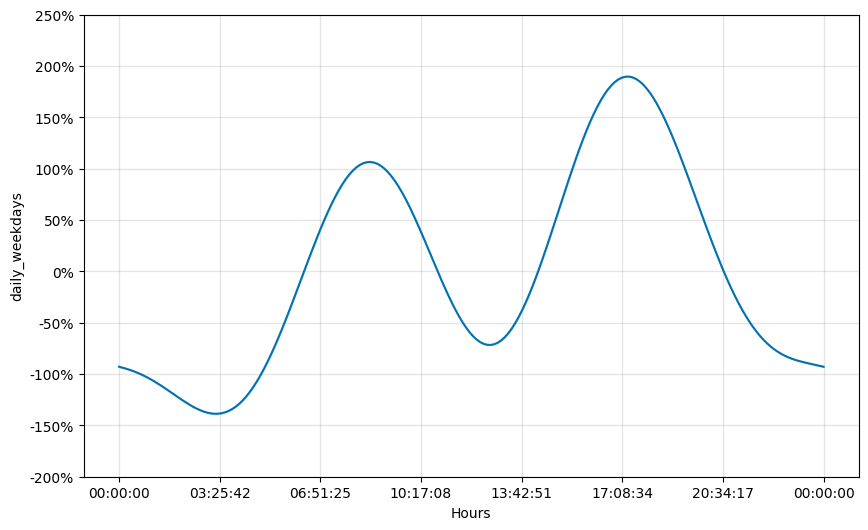

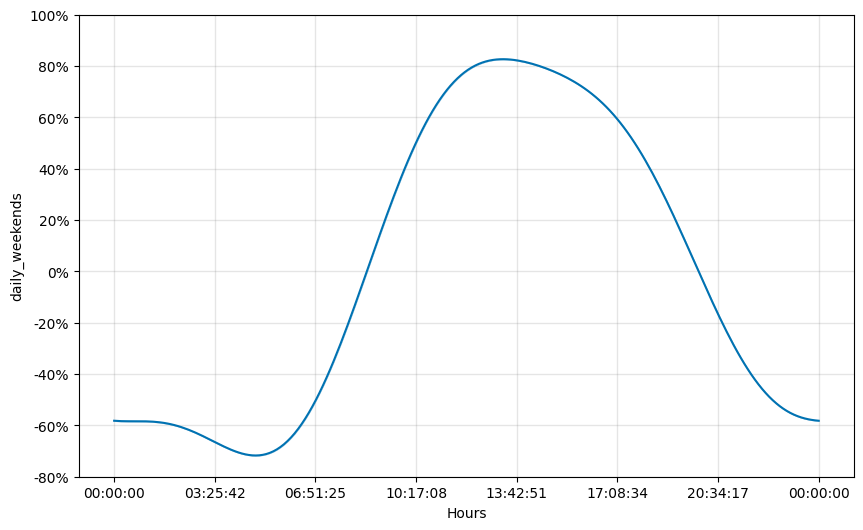

In [42]:
fig_a = plot_seasonality(model, 'daily_weekdays')
fig_b = plot_seasonality(model, 'daily_weekends')

plt.show()